<a href="https://colab.research.google.com/github/sbowma15/image_comparison_metrics/blob/main/image_comparison_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'MSE: 235.6071, PSNR: 24.4089, SSIM: 0.9580')

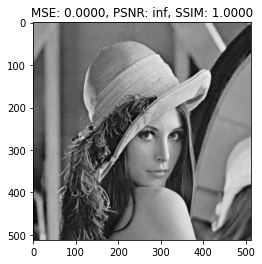

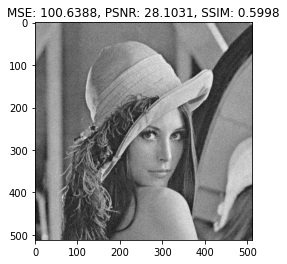

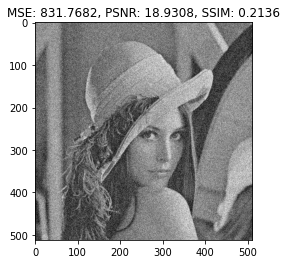

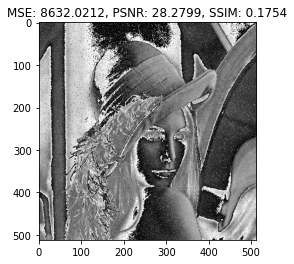

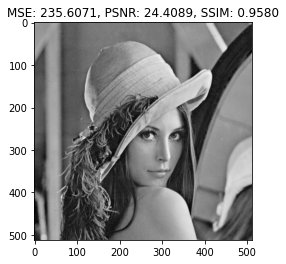

In [ ]:
#This program first compares an original image with itself in order to find the
#the values of a "perfect" image. The values of the perfect image will be used
#in comparison with four copies of the original image which have been altered.
#The first copy of the original image "imB" has had gaussian noise added to-
#observe the effects of the noise when comparing to the original image's mean-
#square root values, structural similarity values, and peak signal-noise ratio.
#The same comparisons are also made with a copy of the original named imA2 which
#recieved a uniformed noise randomly generated between two values on a spectrum.
#These comparisons are ultimately made with two more copies of original image.
#One copy of which has salt and pepper noise added, while the last has had con-
#trast stretching performed.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from google.colab.patches import cv2_imshow

def add_sp_noise( src, percent):
      flat = src.ravel()
      length = len(flat)
      for i in range(int(length*percent/2)):
          index = int(random.random() * length)
          flat[index] = random.randint(0, 1)

      return flat.reshape(src.shape)

def make_g_noise( height, width , variance):
    sigmas = math.sqrt(variance)
    noise = variance * np.random.randn(height,width)
    noise = sigmas * np.random.randn(height,width)

    return noise

############################################################################
#Methods for calculating differences
############################################################################
def SSIM(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

    return ssim_map.mean()

def PSNR(img1, img2):
      img1[0,255]
      img2[0,255]
      #img1 = img1.astype(np.float64)
      #img2 = img2.astype(np.float64)
      mse = np.mean((img1 - img2)**2)
      if mse == 0:
         return float('inf')

      return 20 * math.log10(255.0 / math.sqrt(mse))


def MSE(img1, img2):
    img1[0, 255]
    img2[0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)

    return mse

############################################################################
###                           Main Program
###############################################################################

#the image of lena is read into "imA"
imA =cv.imread('/content/sample_data/lena_g.bmp')
imA0 =cv.imread('/content/sample_data/lena_g.bmp')
imA1 =cv.imread('/content/sample_data/lena_g.bmp')
imA2 =cv.imread('/content/sample_data/lena_g.bmp')
imA3 =cv.imread('/content/sample_data/lena_g.bmp')


#image is converted into gray-scale then placed back into "imA"
imA = cv.cvtColor(imA, cv.COLOR_BGR2GRAY)
imA0 = cv.cvtColor(imA0, cv.COLOR_BGR2GRAY)
imA1 = cv.cvtColor(imA1, cv.COLOR_BGR2GRAY)
imA2 = cv.cvtColor(imA2, cv.COLOR_BGR2GRAY)
imA3 = cv.cvtColor(imA3, cv.COLOR_BGR2GRAY)


#Displays image before beign ran into any methods
#cv2_imshow(imA)

#creates two arrays for later use in making noise for image
length = imA.shape[0]
width = imA.shape[1]

#Makes noise with width and length arrays passed in with value "100" as param.
g_noise = make_g_noise(length, width, 100)

#we set the lower and upper limit between -5, and 5 radomly with the-
#size set to the params. of the length and width of the new arrays made
#from "ImA"
u_noise = np.random.uniform(-50,50, (length, width))

#We now call upon the salt and pepper method to add salt and pepper to a copy of
#the original image and read into "sp_noise"
sp_noise = add_sp_noise(imA0, .12)

#The gaussian noise is added to a copy of the original image and read into "imB"
imB = imA1 + g_noise

#The uniform noise is added to the another copy of the entire image("imA1")
imC = imA2 + u_noise

#the salt and pepper noise is now added to the original image"imA3" and read in-
#to "imD"
imD = imA3 + sp_noise

#This collects the minimums and maximums into "mx", and, "mn" respectively.
#The minimum, "mn' is subtracted from the original image, "imA" then divided by
#the quantity of the maximum minus the minimums. The entirety is multiplied by
#255 to give the pixels relativity
mx=np.amax(imA)
mn=np.amin(imA)
imE=((imA-mn)/(mx-mn))*255

#We first run the original-image(after grayscale), through each method comparing
#the original method to itself to find the values of a "perfect"(original) img.

mseV= MSE(imA, imA)
psnrV = PSNR(imA, imA)
ssimV = SSIM(imA, imA)

plt.figure()
plt.imshow(imA,cmap='gray')
plt.title("MSE: %.4f, PSNR: %.4f, SSIM: %.4f"% (mseV, psnrV, ssimV))

mseV0= MSE(imB, imA)
psnrV0 = PSNR(imB, imA)
ssimV0 = SSIM(imB, imA)

plt.figure()
plt.imshow(imB,cmap='gray')
plt.title("MSE: %.4f, PSNR: %.4f, SSIM: %.4f"% (mseV0, psnrV0,ssimV0))

mseV1= MSE(imC, imA)
psnrV1 = PSNR(imC, imA)
ssimV1 = SSIM(imC, imA)

plt.figure()
plt.imshow(imC,cmap='gray')
plt.title("MSE: %.4f, PSNR: %.4f, SSIM: %.4f"% (mseV1, psnrV1, ssimV1))

mseV2= MSE(imD, imA)
psnrV2 = PSNR(imD, imA)
ssimV2 = SSIM(imD, imA)

plt.figure()
plt.imshow(imD,cmap='gray')
plt.title("MSE: %.4f, PSNR: %.4f, SSIM: %.4f"% (mseV2, psnrV2, ssimV2))

mseV3 = MSE(imE, imA)
psnrV3 = PSNR(imE, imA)
ssimV3 = SSIM(imE, imA)

plt.figure()
plt.imshow(imE,cmap='gray')
plt.title("MSE: %.4f, PSNR: %.4f, SSIM: %.4f"% (mseV3, psnrV3, ssimV3))



